## `understanding state vectors`

`trying out qiskit state vectors - which can use imaginary numbers`

In [1]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


`display vectors - latex is personally preferred`

In [4]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [5]:
display(v.draw("latex"))
display(w.draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

`check if Euclidian norm = 1`

In [3]:
display(u.is_valid())
display(w.is_valid())

True

False

`w is false becuase 1/9 + 4/9 != 1. these are quantum state not probability vectors.`

## `simulate vector measurement`

In [15]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

In [16]:
display(v.is_valid())

True

In [17]:
v.measure()

(np.str_('1'),
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

`since output is not deterministic we can sample the output`

{np.str_('0'): np.int64(5614), np.str_('1'): np.int64(4386)}

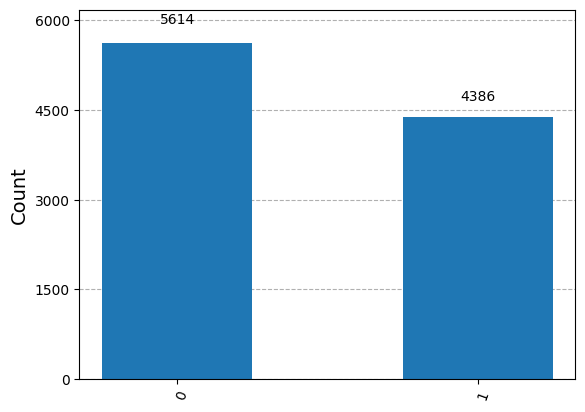

In [26]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(10000)
display(statistics)
plot_histogram(statistics)

`understanding operators`

In [29]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("latex")

<IPython.core.display.Latex object>

`operators from a circuit standpoint`

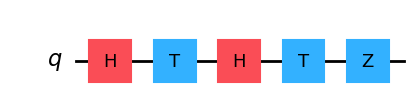

In [32]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw("mpl")

In [34]:
# evolving statevector with circuit above
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("latex")

<IPython.core.display.Latex object>

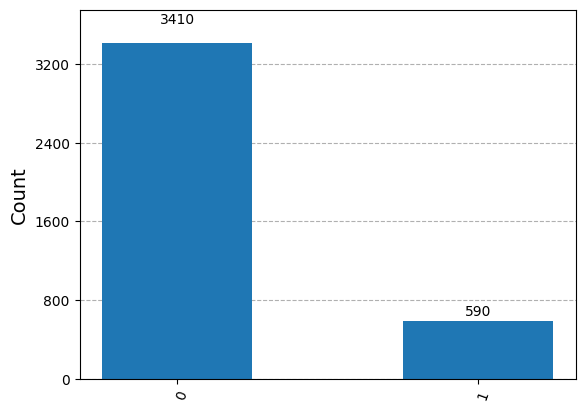

In [35]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)